In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv("Obesity.csv")
display(dataset.head())

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
print(dataset.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [7]:
print(f"\n Il dataset contiene {dataset.shape[0]} osservazioni e {dataset.shape[1]} variabili.\n")


 Il dataset contiene 2114 osservazioni e 17 variabili.



In [9]:
dataset.rename(columns={"FAVC": "High_Caloric_Food", 
                        "FCVC": "VegetableConsumption", 
                        "NCP": "Main_Meals_Per_Day", 
                        "CAEC": "Food_Between_Meals", 
                        "CH2O": "Water_Intake", 
                        "SCC": "Calorie_Monitoring", 
                        "FAF": "Physical_Activity_Frequency", 
                        "TUE": "Tech_use_Time", 
                        "CALC": "Alcohol_Consumption", 
                        "MTRANS": "Transport_Mode", 
                        "NObeyesdad": "Obesity_Level",}, inplace=True)
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'High_Caloric_Food', 'VegetableConsumption', 'Main_Meals_Per_Day',
       'Food_Between_Meals', 'SMOKE', 'Water_Intake', 'Calorie_Monitoring',
       'Physical_Activity_Frequency', 'Tech_use_Time', 'Alcohol_Consumption',
       'Transport_Mode', 'Obesity_Level'],
      dtype='object')

In [38]:
print("\nValori Mancanti per ogni variabile\n")
missing_values = dataset.isna().sum()
missing_values


Valori Mancanti per ogni variabile



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
VegetableConsumption              0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               5
Transport_Mode                    0
Obesity_Level                     1
dtype: int64

In [11]:
missing_values_percent = (missing_values/len(dataset))*100
missing_values_table = pd.DataFrame({"Valori Mancanti": missing_values, "% del totale": missing_values_percent})
display(missing_values_table[missing_values_table["Valori Mancanti"] > 0])

print(f"\n Valori mancanti Consumo Alcolici\n")
dataset[dataset["Alcohol_Consumption"].isna()] 

Valori Mancanti  % del totale
Alcohol_Consumption                5      0.236518
Obesity_Level                      1      0.047304


 Valori mancanti Consumo Alcolici



Gender   Age  Height  Weight family_history_with_overweight  \
13     Male  41.0    1.80    99.0                             no   
94   Female  24.0    1.60    48.0                             no   
162  Female  21.0    1.63    60.0                            yes   
278  Female  32.0    1.57    57.0                            yes   
463    Male  17.0    1.80    68.0                            yes   

    High_Caloric_Food  VegetableConsumption  Main_Meals_Per_Day  \
13                yes                   2.0                 3.0   
94                yes                   3.0                 3.0   
162               yes                   3.0                 3.0   
278               yes                   3.0                 3.0   
463                no                   2.0                 3.0   

    Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
13           Sometimes    no           2.0                 no   
94           Sometimes    no           2.0                 no   
162             Always   yes           2.0                 no   
278          Sometimes    no           2.0                 no   
463          Sometimes    no           1.0                 no   

     Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
13                           2.0            1.0                 NaN   
94                           2.0            0.0                 NaN   
162                          2.0            0.0                 NaN   
278                          0.0            0.0                 NaN   
463                          2.0            1.0                 NaN   

            Transport_Mode   Obesity_Level  
13              Automobile  Obesity_Type_I  
94   Public_Transportation   Normal_Weight  
162  Public_Transportation   Normal_Weight  
278             Automobile   Normal_Weight  
463  Public_Transportation   Normal_Weight

In [12]:
print(f"\n Valori mancanti livello Obesità\n")
dataset[dataset["Obesity_Level"].isna()] 


 Valori mancanti livello Obesità



Gender   Age  Height  Weight family_history_with_overweight  \
376  Female  36.0    1.58    60.0                            yes   

    High_Caloric_Food  VegetableConsumption  Main_Meals_Per_Day  \
376                no                   3.0                 3.0   

    Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
376          Sometimes    no           1.0                 no   

     Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
376                          2.0            0.0           Sometimes   

    Transport_Mode Obesity_Level  
376     Automobile           NaN

In [36]:
print("\nGestione valori mancanti\n")
#da scegliere tra due strategie: rimozione (dataset.dropna()) o imputazione (dataset.fillna(value)) 
#nel primo caso eliminiamo tutte le righe che presentano dei valori mancanti (adatto quando ci sono pochi valori mancanti)
#nel secondo caso sostituiamo i valori mancanti con un valore (es: media, mediana, ecc...) (adatto quando non si vogliono perdere dati ed è possibile stimare il valori mancanti)
dataset_clean = dataset.dropna()
missing_values = dataset_clean.isna().sum()
missing_values


Gestione valori mancanti



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
VegetableConsumption              0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               0
Transport_Mode                    0
Obesity_Level                     0
dtype: int64

In [34]:
print("\nUnivariate Data Description \n")

var_numeriche = dataset_clean.select_dtypes(include=["int64", "float64"]).columns
var_categoriche = dataset_clean.select_dtypes(exclude=["int64", "float64"]).columns
print(f"\n Variabili numeriche: {list(var_numeriche)} \n")
print(f"\n Variabili categoriche: {list(var_categoriche)} \n")




Univariate Data Description 


 Variabili numeriche: ['Age', 'Height', 'Weight', 'VegetableConsumption', 'Main_Meals_Per_Day', 'Water_Intake', 'Physical_Activity_Frequency', 'Tech_use_Time'] 


 Variabili categoriche: ['Gender', 'family_history_with_overweight', 'High_Caloric_Food', 'Food_Between_Meals', 'SMOKE', 'Calorie_Monitoring', 'Alcohol_Consumption', 'Transport_Mode', 'Obesity_Level'] 



In [33]:
print("\nDescriptive Statistic: \n")
stats = dataset_clean[var_numeriche].describe().T
stats.rename(columns={'50%': 'median'}, inplace=True)
display(stats)


Descriptive Statistic: 



count       mean        std    min        25%  \
Age                          2108.0  24.297195   6.332283  14.00  19.931667   
Height                       2108.0   1.701801   0.093227   1.45   1.630000   
Weight                       2108.0  86.609750  26.196130  39.00  65.815202   
VegetableConsumption         2108.0   2.417277   0.534778   1.00   2.000000   
Main_Meals_Per_Day           2108.0   2.685753   0.779051   1.00   2.658599   
Water_Intake                 2108.0   2.008730   0.613066   1.00   1.587615   
Physical_Activity_Frequency  2108.0   1.008891   0.850375   0.00   0.121230   
Tech_use_Time                2108.0   0.659277   0.608730   0.00   0.000000   

                                median         75%     max  
Age                          22.771307   26.000000   61.00  
Height                        1.700563    1.768450    1.98  
Weight                       83.000000  107.501904  173.00  
VegetableConsumption          2.381934    3.000000    3.00  
Main_Meals_Per_Day            3.000000    3.000000    4.00  
Water_Intake                  2.000000    2.480347    3.00  
Physical_Activity_Frequency   1.000000    1.662348    3.00  
Tech_use_Time                 0.627973    1.000000    2.00

In [16]:
print("\n Tabelle di frequenza: \n")
for var in var_categoriche:
    print(f"\nFrequenze per '{var}':")
    print(dataset_clean[var].value_counts())
    print("-" * 40)


 Tabelle di frequenza: 


Frequenze per 'Gender':
Gender
Male      1067
Female    1041
Name: count, dtype: int64
----------------------------------------

Frequenze per 'family_history_with_overweight':
family_history_with_overweight
yes    1722
no      386
Name: count, dtype: int64
----------------------------------------

Frequenze per 'High_Caloric_Food':
High_Caloric_Food
yes    1864
no      244
Name: count, dtype: int64
----------------------------------------

Frequenze per 'Food_Between_Meals':
Food_Between_Meals
Sometimes     1763
Frequently     242
Always          52
no              51
Name: count, dtype: int64
----------------------------------------

Frequenze per 'SMOKE':
SMOKE
no     2065
yes      43
Name: count, dtype: int64
----------------------------------------

Frequenze per 'Calorie_Monitoring':
Calorie_Monitoring
no     2012
yes      96
Name: count, dtype: int64
----------------------------------------

Frequenze per 'Alcohol_Consumption':
Alcohol_Consumption
Some


 Distribuzioni delle variabili numeriche: 


 Istogrammi: 



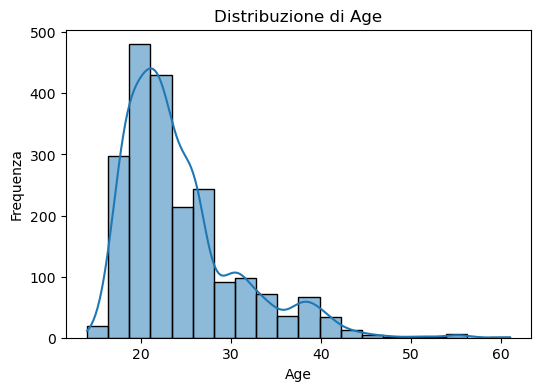

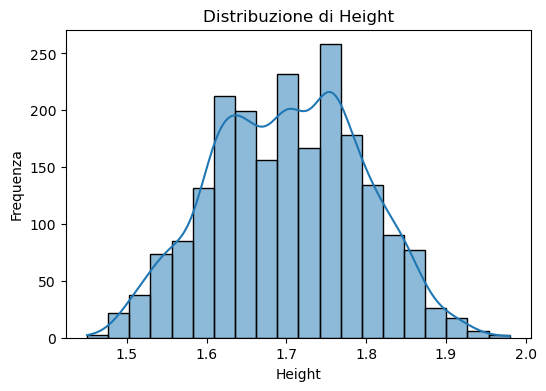

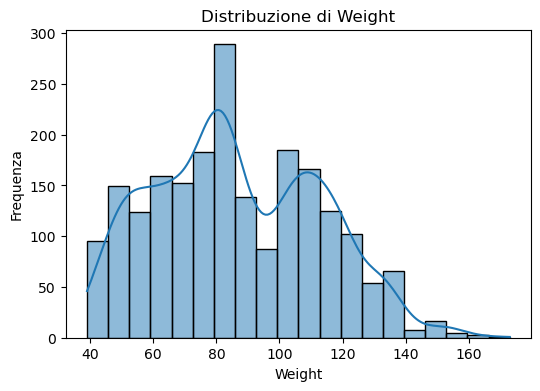

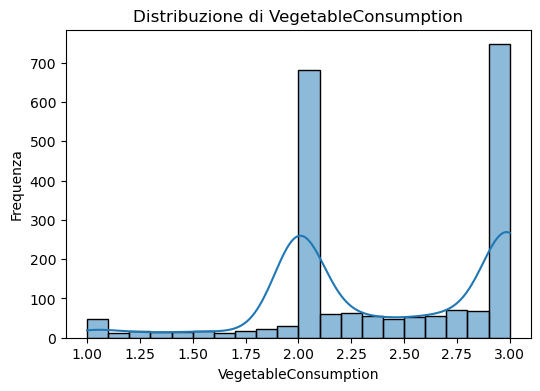

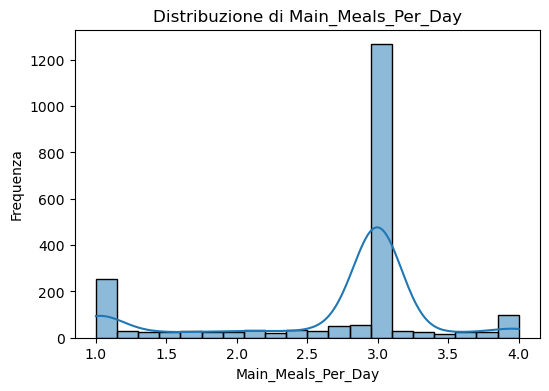

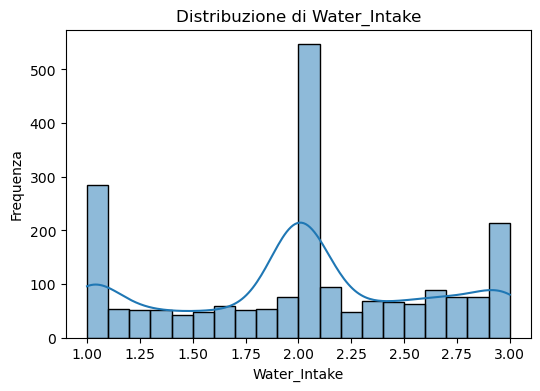

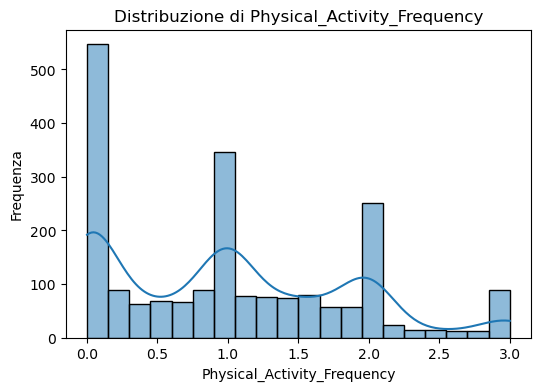

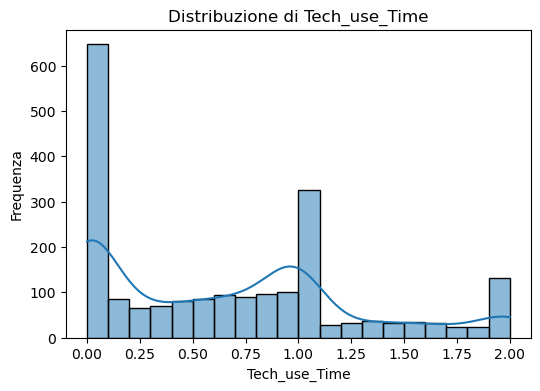

In [17]:
print("\n Distribuzioni delle variabili numeriche: \n")
print("\n Istogrammi: \n")
for var in var_numeriche:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset_clean[var], kde=True, bins=20)
    plt.title(f"Distribuzione di {var}")
    plt.xlabel(var)
    plt.ylabel("Frequenza")
    plt.show()


 Boxplot: 



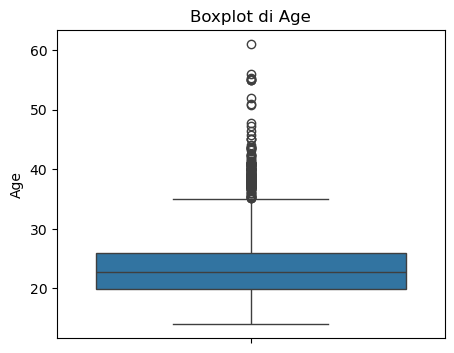

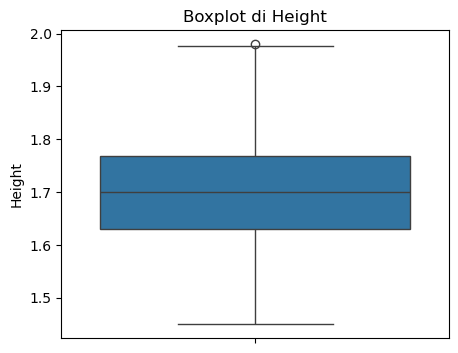

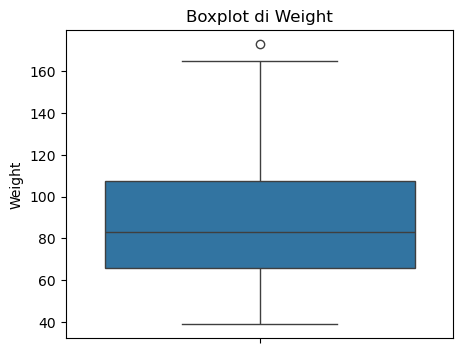

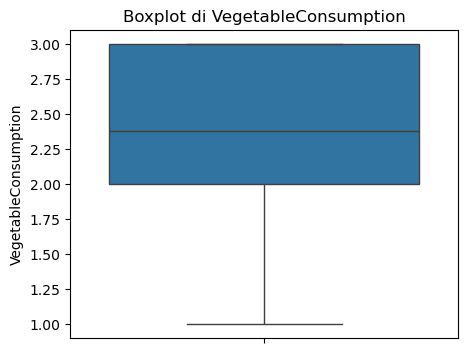

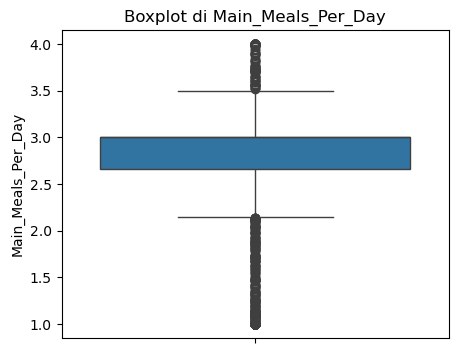

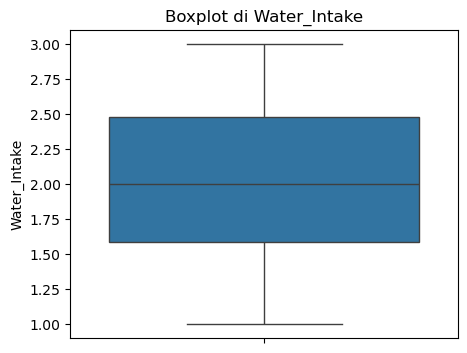

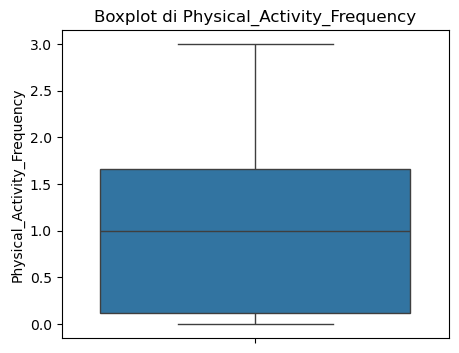

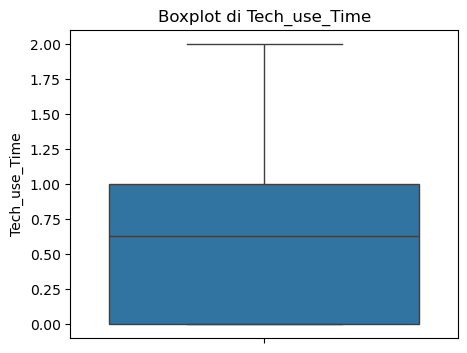

In [18]:
print("\n Boxplot: \n")
for var in var_numeriche:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=dataset_clean[var])
    #plt.boxplot(dataset_clean[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), medianprops=dict(color='red', linewidth=2))
    plt.title(f"Boxplot di {var}")
    plt.ylabel(var)
    plt.show()


 Distribuzioni delle variabili numeriche: 



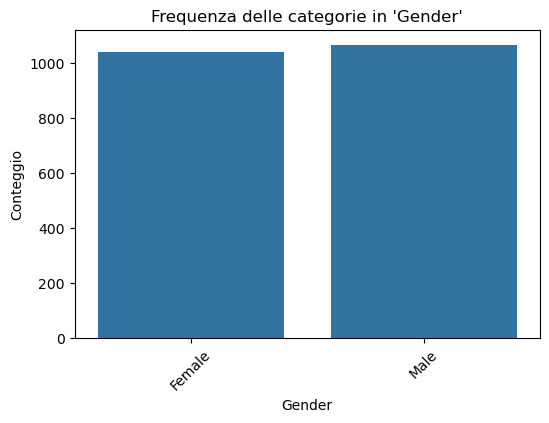

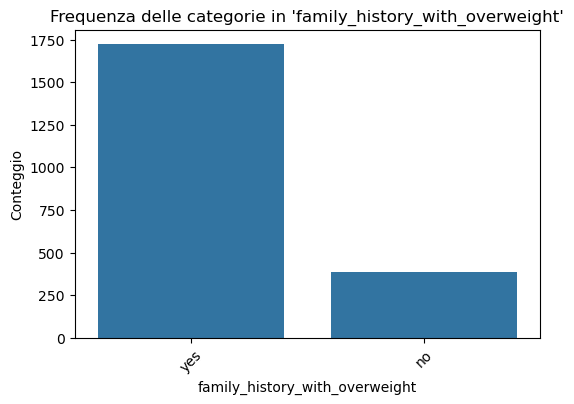

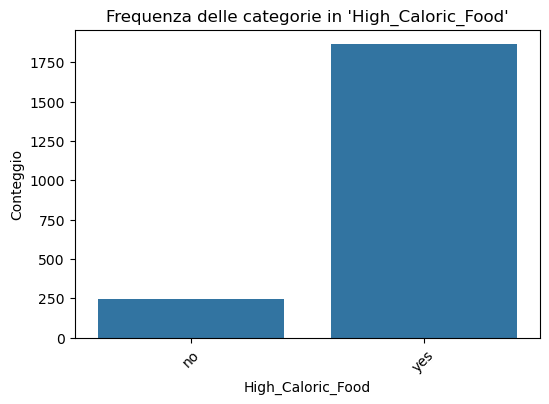

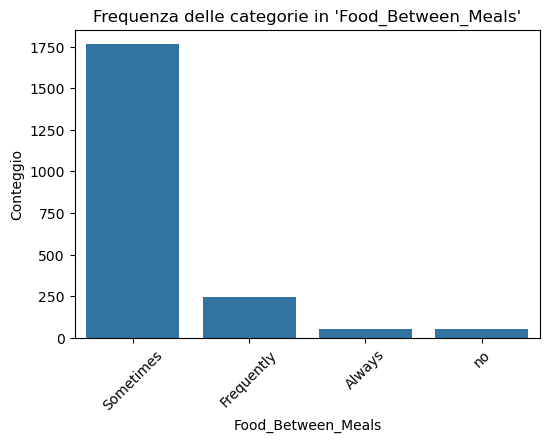

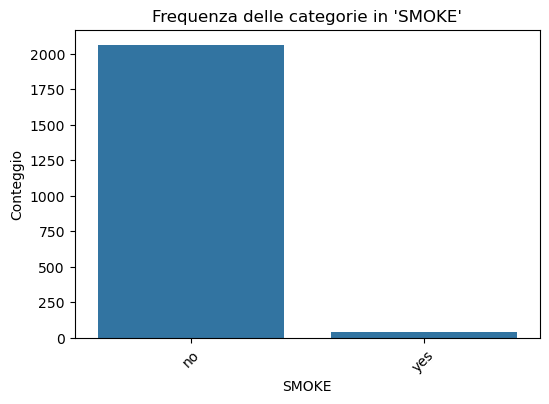

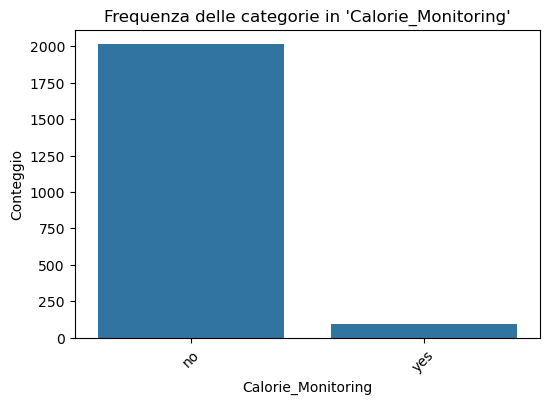

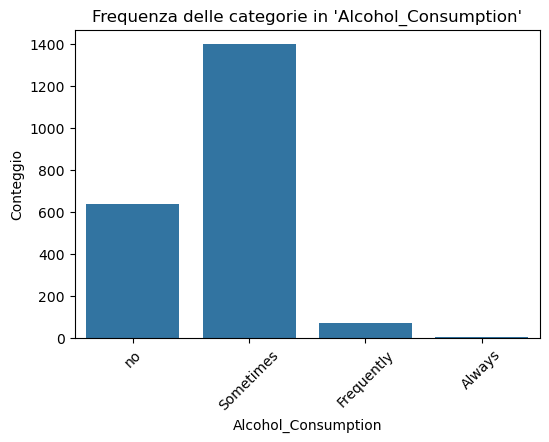

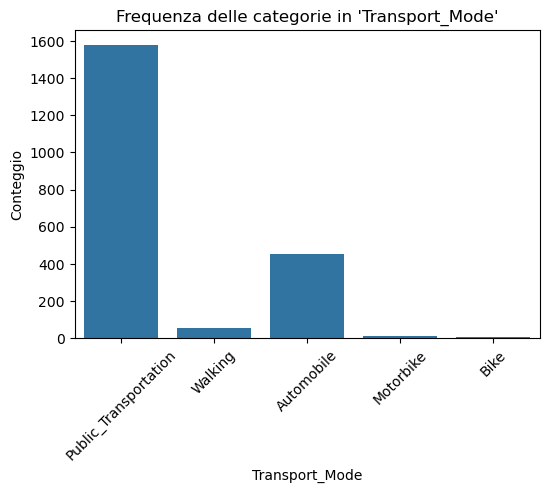

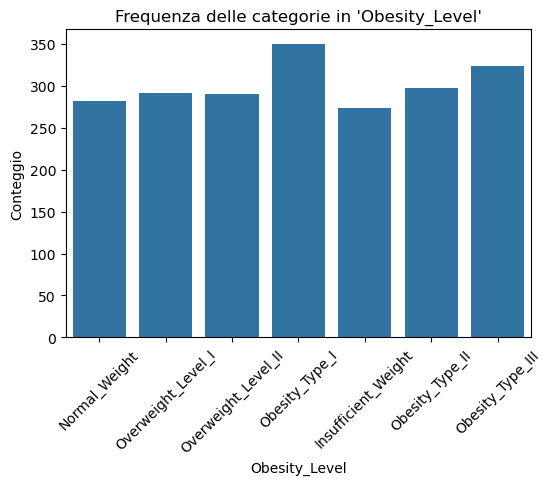

In [19]:
print("\n Distribuzioni delle variabili numeriche: \n")
for var in var_categoriche:
    plt.figure(figsize=(6,4))
    sns.countplot(x=dataset_clean[var])
    plt.title(f"Frequenza delle categorie in '{var}'")
    plt.xlabel(var)
    plt.ylabel("Conteggio")
    plt.xticks(rotation=45)
    plt.show()

In [20]:
print("\n Correlation matrix:")
corr_matrix = dataset_clean[var_numeriche].corr()
display(corr_matrix)



 Correlation matrix:


Age    Height    Weight  \
Age                          1.000000 -0.024685  0.204528   
Height                      -0.024685  1.000000  0.462065   
Weight                       0.204528  0.462065  1.000000   
VegetableConsumption         0.016038 -0.035894  0.219837   
Main_Meals_Per_Day          -0.044907  0.245007  0.107573   
Water_Intake                -0.044099  0.214075  0.200480   
Physical_Activity_Frequency -0.147389  0.294347 -0.051578   
Tech_use_Time               -0.297516  0.049218 -0.074778   

                             VegetableConsumption  Main_Meals_Per_Day  \
Age                                      0.016038           -0.044907   
Height                                  -0.035894            0.245007   
Weight                                   0.219837            0.107573   
VegetableConsumption                     1.000000            0.039238   
Main_Meals_Per_Day                       0.039238            1.000000   
Water_Intake                             0.069588            0.057841   
Physical_Activity_Frequency              0.019682            0.128311   
Tech_use_Time                           -0.099611            0.037690   

                             Water_Intake  Physical_Activity_Frequency  \
Age                             -0.044099                    -0.147389   
Height                           0.214075                     0.294347   
Weight                           0.200480                    -0.051578   
VegetableConsumption             0.069588                     0.019682   
Main_Meals_Per_Day               0.057841                     0.128311   
Water_Intake                     1.000000                     0.167952   
Physical_Activity_Frequency      0.167952                     1.000000   
Tech_use_Time                    0.011328                     0.059549   

                             Tech_use_Time  
Age                              -0.297516  
Height                            0.049218  
Weight                           -0.074778  
VegetableConsumption             -0.099611  
Main_Meals_Per_Day                0.037690  
Water_Intake                      0.011328  
Physical_Activity_Frequency       0.059549  
Tech_use_Time                     1.000000

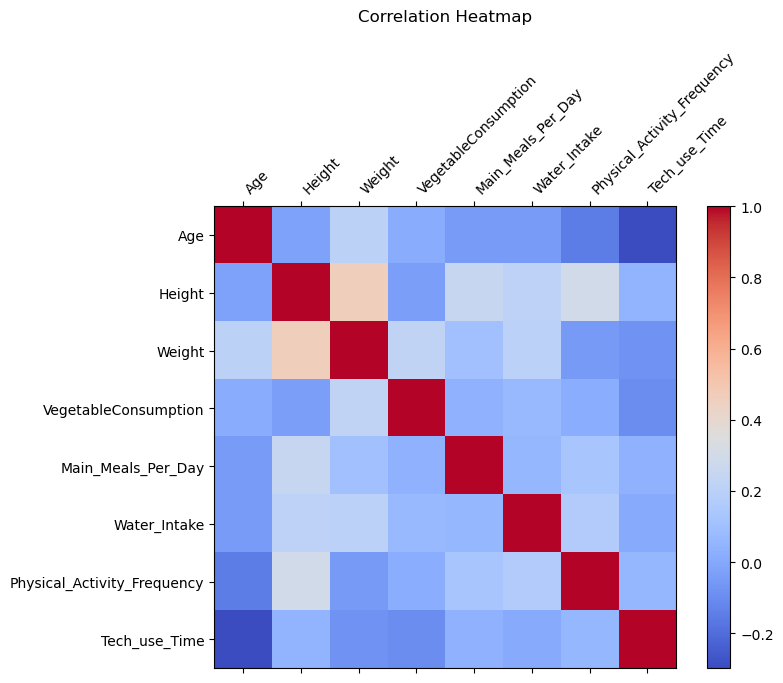

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
fig.colorbar(cax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()

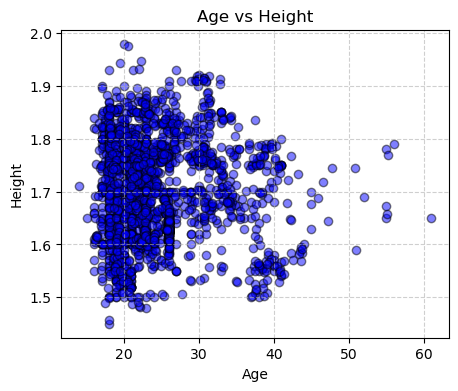

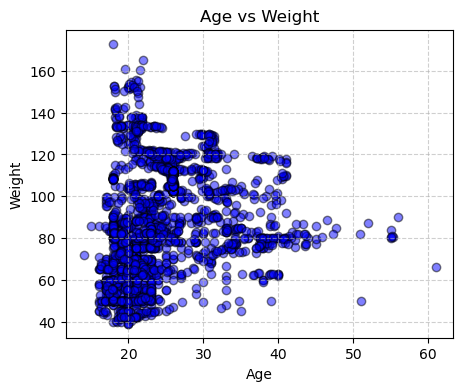

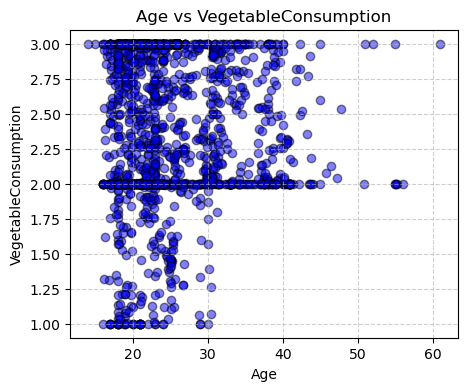

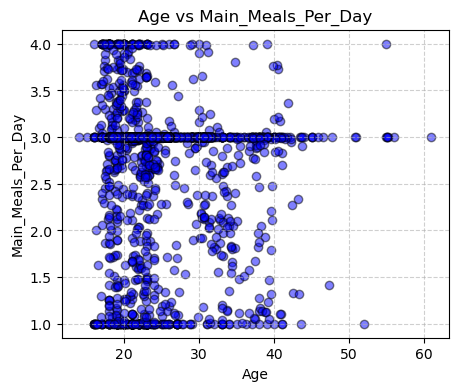

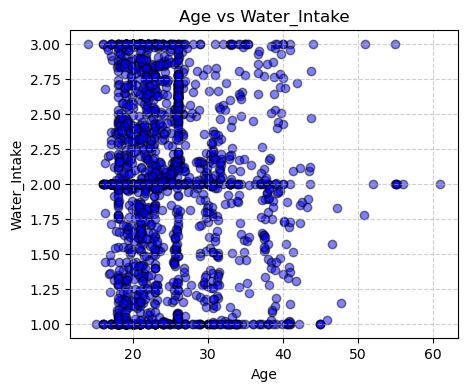

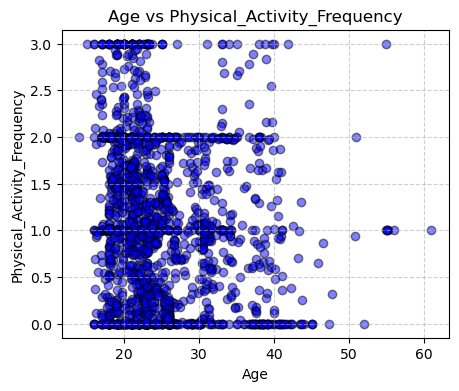

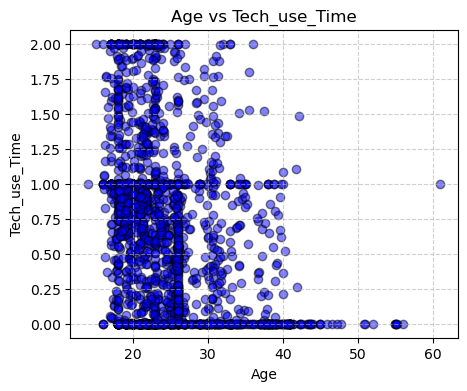

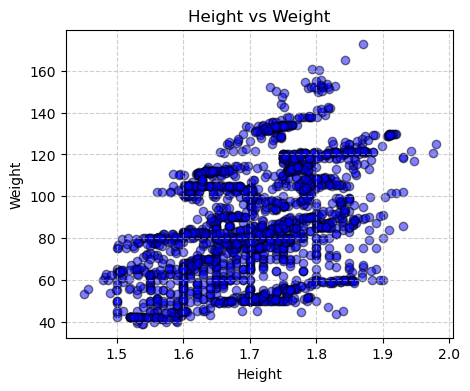

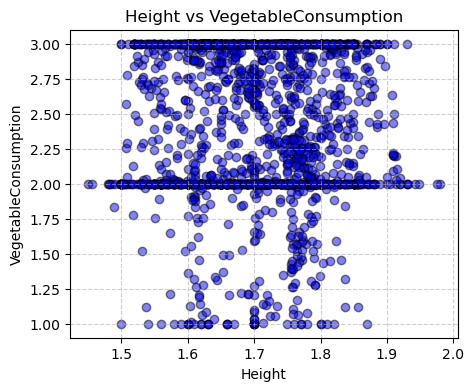

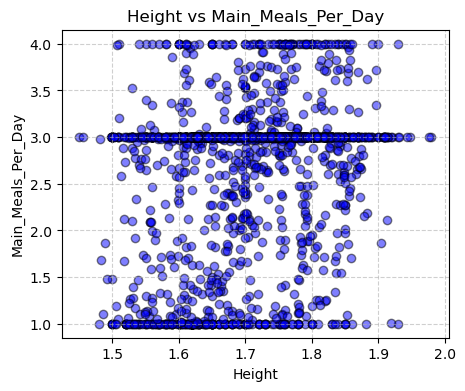

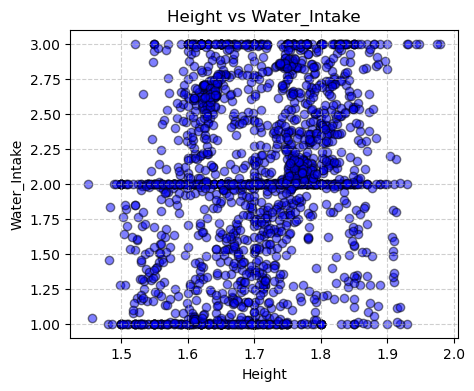

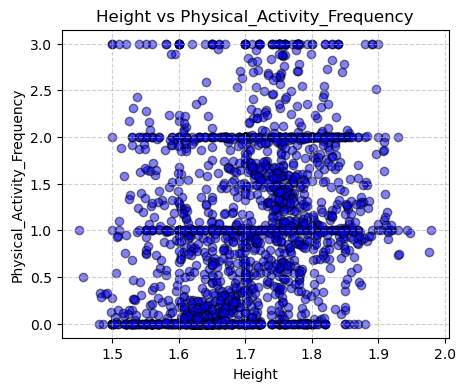

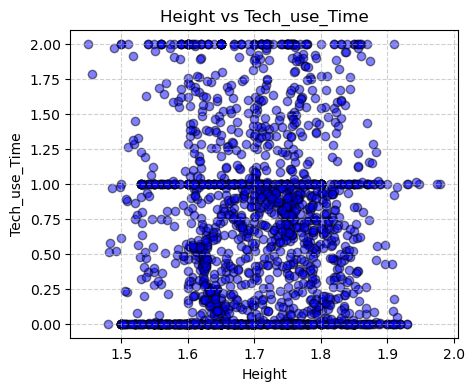

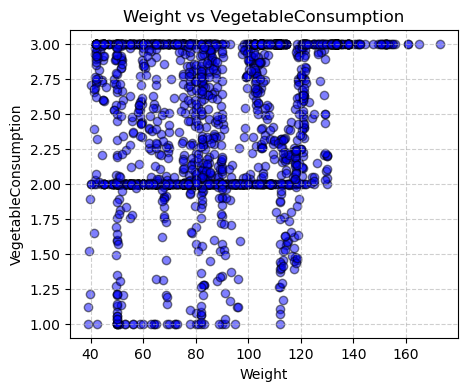

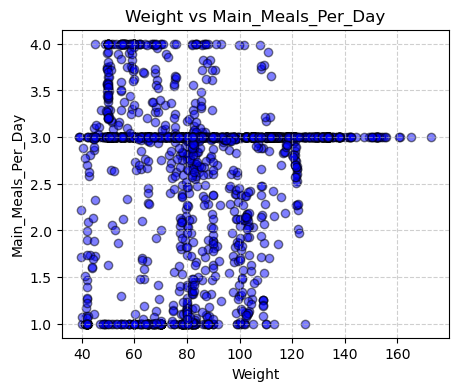

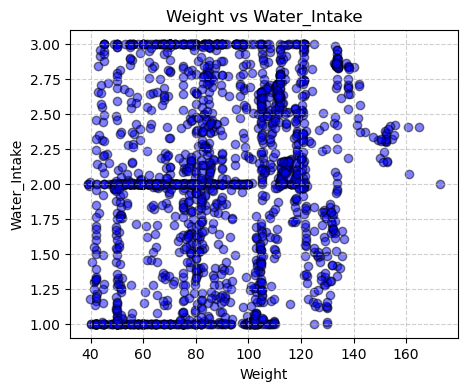

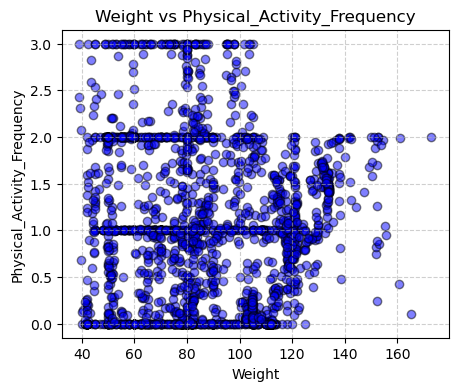

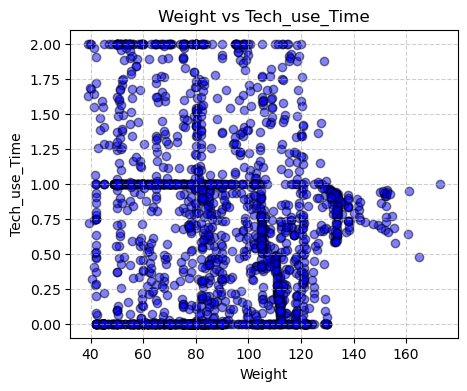

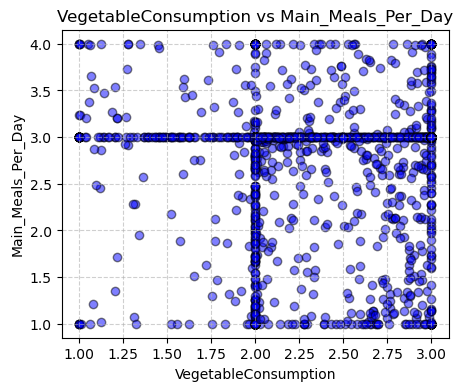

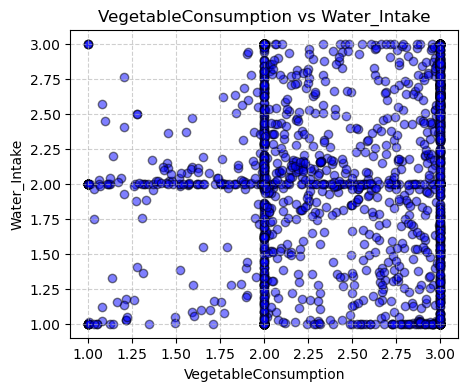

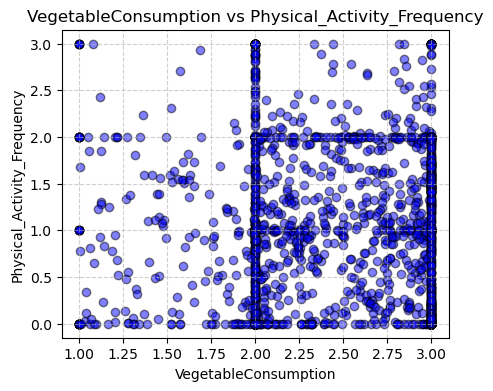

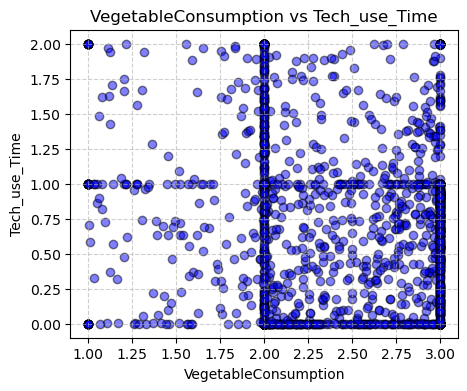

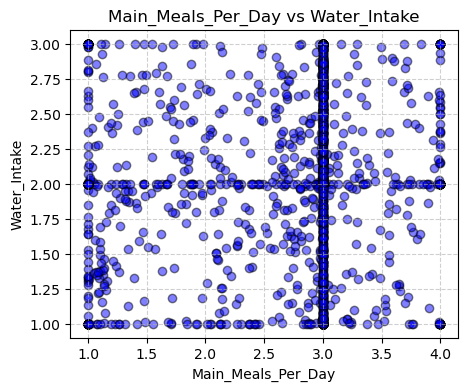

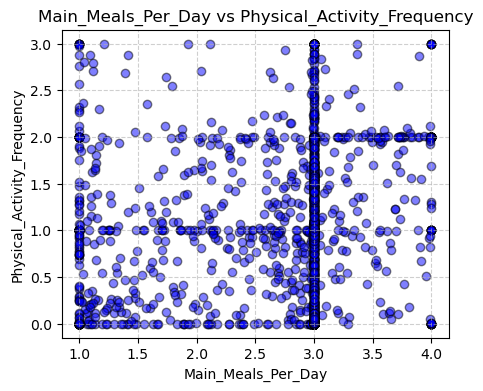

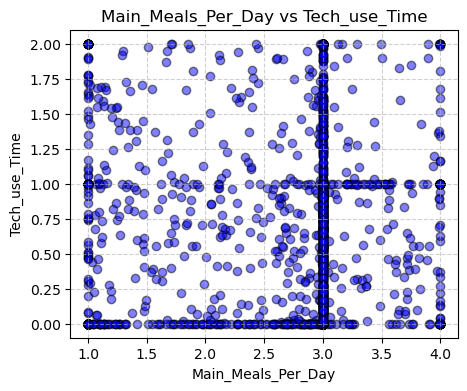

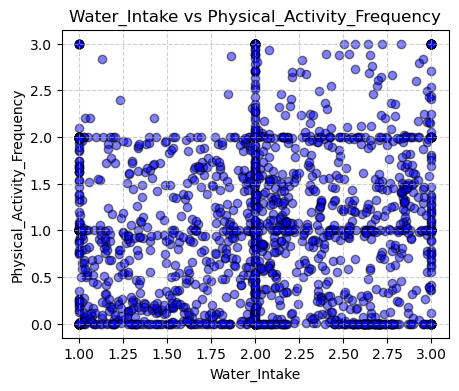

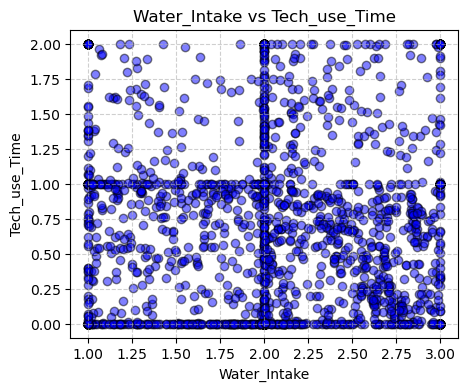

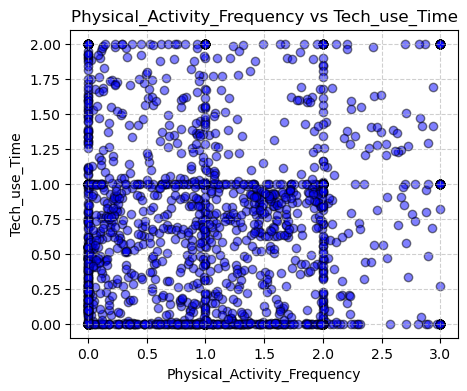

In [22]:
#Scatterplot per coppie di variabili numeriche
for i, var1 in enumerate(var_numeriche):
    for var2 in var_numeriche[i+1:]:
        plt.figure(figsize=(5,4))
        plt.scatter(dataset_clean[var1], dataset_clean[var2], alpha=0.5, color='blue', edgecolors='black')
        plt.title(f"{var1} vs {var2}")
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

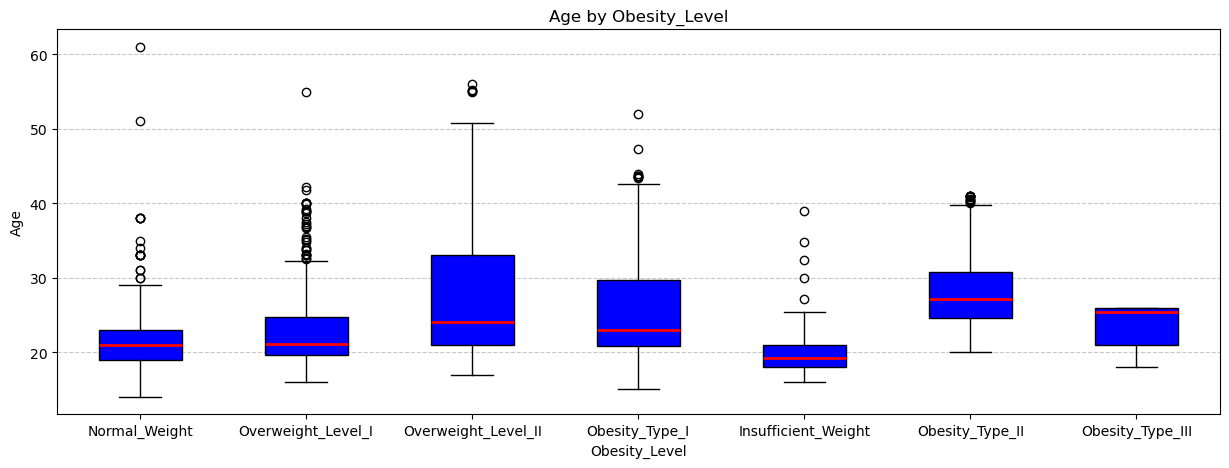

In [28]:
# Confronto di una variabile numerica rispetto a una categorica
# (Esempio: distribuzione dell'età per ciascun livello di obesità)
target = "Obesity_Level"  # nome della variabile target

if target in dataset_clean.columns:
    first_numvar = var_numeriche[0]  # prima variabile numerica
    categories = dataset_clean[target].unique()
    plt.figure(figsize=(15,5))
    data_to_plot = [dataset_clean[dataset_clean[target] == cat][first_numvar] for cat in categories]
    plt.boxplot(data_to_plot, tick_labels=categories, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f"{first_numvar} by {target}")
    plt.xlabel(target)
    plt.ylabel(first_numvar)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [32]:
categorical_pairs = [(var_categoriche[i], var_categoriche[j])
                     for i in range(len(var_categoriche))
                         for j in range(i+1, len(var_categoriche))]

print("\nContingency tables:")
for var1, var2 in categorical_pairs:  
    print(f"\n{var1} vs {var2}")
    display(pd.crosstab(dataset_clean[var1], dataset_clean[var2]))


Contingency tables:

Gender vs family_history_with_overweight


family_history_with_overweight   no  yes
Gender                                  
Female                          233  808
Male                            153  914


Gender vs High_Caloric_Food


High_Caloric_Food   no  yes
Gender                     
Female             143  898
Male               101  966


Gender vs Food_Between_Meals


Food_Between_Meals  Always  Frequently  Sometimes  no
Gender                                               
Female                  22         161        843  15
Male                    30          81        920  36


Gender vs SMOKE


SMOKE     no  yes
Gender           
Female  1027   14
Male    1038   29


Gender vs Calorie_Monitoring


Calorie_Monitoring    no  yes
Gender                       
Female               971   70
Male                1041   26


Gender vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Gender                                                 
Female                    0          28        710  303
Male                      1          41        689  336


Gender vs Transport_Mode


Transport_Mode  Automobile  Bike  Motorbike  Public_Transportation  Walking
Gender                                                                     
Female                 164     0          2                    854       21
Male                   291     7          9                    725       35


Gender vs Obesity_Level


Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                              
Female                         175            137             156   
Male                            99            145             194   

Obesity_Level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                                 
Female                       2               323                 145   
Male                       295                 1                 146   

Obesity_Level  Overweight_Level_II  
Gender                              
Female                         103  
Male                           187


family_history_with_overweight vs High_Caloric_Food


High_Caloric_Food                no   yes
family_history_with_overweight           
no                              100   286
yes                             144  1578


family_history_with_overweight vs Food_Between_Meals


Food_Between_Meals              Always  Frequently  Sometimes  no
family_history_with_overweight                                   
no                                  19         114        220  33
yes                                 33         128       1543  18


family_history_with_overweight vs SMOKE


SMOKE                             no  yes
family_history_with_overweight           
no                               380    6
yes                             1685   37


family_history_with_overweight vs Calorie_Monitoring


Calorie_Monitoring                no  yes
family_history_with_overweight           
no                               337   49
yes                             1675   47


family_history_with_overweight vs Alcohol_Consumption


Alcohol_Consumption             Always  Frequently  Sometimes   no
family_history_with_overweight                                    
no                                   0          15        267  104
yes                                  1          54       1132  535


family_history_with_overweight vs Transport_Mode


Transport_Mode                  Automobile  Bike  Motorbike  \
family_history_with_overweight                                
no                                      50     2          5   
yes                                    405     5          6   

Transport_Mode                  Public_Transportation  Walking  
family_history_with_overweight                                  
no                                                310       19  
yes                                              1269       37


family_history_with_overweight vs Obesity_Level


Obesity_Level                   Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                              148            131   
yes                                             126            151   

Obesity_Level                   Obesity_Type_I  Obesity_Type_II  \
family_history_with_overweight                                    
no                                           6                1   
yes                                        344              296   

Obesity_Level                   Obesity_Type_III  Overweight_Level_I  \
family_history_with_overweight                                         
no                                             0                  82   
yes                                          324                 209   

Obesity_Level                   Overweight_Level_II  
family_history_with_overweight                       
no                                               18  
yes                                             272


High_Caloric_Food vs Food_Between_Meals


Food_Between_Meals  Always  Frequently  Sometimes  no
High_Caloric_Food                                    
no                      12          67        156   9
yes                     40         175       1607  42


High_Caloric_Food vs SMOKE


SMOKE                no  yes
High_Caloric_Food           
no                  234   10
yes                1831   33


High_Caloric_Food vs Calorie_Monitoring


Calorie_Monitoring    no  yes
High_Caloric_Food            
no                   206   38
yes                 1806   58


High_Caloric_Food vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
High_Caloric_Food                                      
no                        0          15        117  112
yes                       1          54       1282  527


High_Caloric_Food vs Transport_Mode


Transport_Mode     Automobile  Bike  Motorbike  Public_Transportation  Walking
High_Caloric_Food                                                             
no                         36     4          3                    175       26
yes                       419     3          8                   1404       30


High_Caloric_Food vs Obesity_Level


Obesity_Level      Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
High_Caloric_Food                                                       
no                                  52             77              11   
yes                                222            205             339   

Obesity_Level      Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
High_Caloric_Food                                                          
no                               7                 1                  22   
yes                            290               323                 269   

Obesity_Level      Overweight_Level_II  
High_Caloric_Food                       
no                                  74  
yes                                216


Food_Between_Meals vs SMOKE


SMOKE                 no  yes
Food_Between_Meals           
Always                50    2
Frequently           233    9
Sometimes           1732   31
no                    50    1


Food_Between_Meals vs Calorie_Monitoring


Calorie_Monitoring    no  yes
Food_Between_Meals           
Always                44    8
Frequently           215   27
Sometimes           1709   54
no                    44    7


Food_Between_Meals vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Food_Between_Meals                                     
Always                    0           7         27   18
Frequently                1          16        120  105
Sometimes                 0          44       1210  509
no                        0           2         42    7


Food_Between_Meals vs Transport_Mode


Transport_Mode      Automobile  Bike  Motorbike  Public_Transportation  \
Food_Between_Meals                                                       
Always                      12     1          1                     32   
Frequently                  25     0          5                    201   
Sometimes                  415     6          5                   1300   
no                           3     0          0                     46   

Transport_Mode      Walking  
Food_Between_Meals           
Always                    6  
Frequently               11  
Sometimes                37  
no                        2


Food_Between_Meals vs Obesity_Level


Obesity_Level       Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Food_Between_Meals                                                       
Always                                2             34               6   
Frequently                          121             83               6   
Sometimes                           148            155             337   
no                                    3             10               1   

Obesity_Level       Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Food_Between_Meals                                                          
Always                            2                 0                   5   
Frequently                        1                 1                  14   
Sometimes                       293               323                 237   
no                                1                 0                  35   

Obesity_Level       Overweight_Level_II  
Food_Between_Meals                       
Always                                3  
Frequently                           16  
Sometimes                           270  
no                                    1


SMOKE vs Calorie_Monitoring


Calorie_Monitoring    no  yes
SMOKE                        
no                  1974   91
yes                   38    5


SMOKE vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
SMOKE                                                  
no                        1          62       1369  633
yes                       0           7         30    6


SMOKE vs Transport_Mode


Transport_Mode  Automobile  Bike  Motorbike  Public_Transportation  Walking
SMOKE                                                                      
no                     444     7         10                   1550       54
yes                     11     0          1                     29        2


SMOKE vs Obesity_Level


Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SMOKE                                                               
no                             273            270             344   
yes                              1             12               6   

Obesity_Level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SMOKE                                                                  
no                         282               323                 288   
yes                         15                 1                   3   

Obesity_Level  Overweight_Level_II  
SMOKE                               
no                             285  
yes                              5


Calorie_Monitoring vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Calorie_Monitoring                                     
no                        1          61       1344  606
yes                       0           8         55   33


Calorie_Monitoring vs Transport_Mode


Transport_Mode      Automobile  Bike  Motorbike  Public_Transportation  \
Calorie_Monitoring                                                       
no                         442     6          9                   1505   
yes                         13     1          2                     74   

Transport_Mode      Walking  
Calorie_Monitoring           
no                       50  
yes                       6


Calorie_Monitoring vs Obesity_Level


Obesity_Level       Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Calorie_Monitoring                                                       
no                                  252            252             348   
yes                                  22             30               2   

Obesity_Level       Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Calorie_Monitoring                                                          
no                              296               324                 254   
yes                               1                 0                  37   

Obesity_Level       Overweight_Level_II  
Calorie_Monitoring                       
no                                  286  
yes                                   4


Alcohol_Consumption vs Transport_Mode


Transport_Mode       Automobile  Bike  Motorbike  Public_Transportation  \
Alcohol_Consumption                                                       
Always                        0     0          0                      0   
Frequently                   28     0          0                     38   
Sometimes                   269     4          6                   1091   
no                          158     3          5                    450   

Transport_Mode       Walking  
Alcohol_Consumption           
Always                     1  
Frequently                 3  
Sometimes                 29  
no                        23


Alcohol_Consumption vs Obesity_Level


Obesity_Level        Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Alcohol_Consumption                                                       
Always                                 0              1               0   
Frequently                             1             18              13   
Sometimes                            156            157             172   
no                                   117            106             165   

Obesity_Level        Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Alcohol_Consumption                                                          
Always                             0                 0                   0   
Frequently                         2                 0                  16   
Sometimes                        224               323                 224   
no                                71                 1                  51   

Obesity_Level        Overweight_Level_II  
Alcohol_Consumption                       
Always                                 0  
Frequently                            19  
Sometimes                            143  
no                                   128


Transport_Mode vs Obesity_Level


Obesity_Level          Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Transport_Mode                                                              
Automobile                              46             43             109   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  222            197             236   
Walking                                  6             32               2   

Obesity_Level          Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Transport_Mode                                                                 
Automobile                          95                 1                  67   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   1   
Public_Transportation              200               323                 212   
Walking                              1                 0                   9   

Obesity_Level          Overweight_Level_II  
Transport_Mode                              
Automobile                              94  
Bike                                     0  
Motorbike                                1  
Public_Transportation                  189  
Walking                                  6

In [ ]:
ciao